In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
# from .autonotebook import tqdm as notebook_tqdm

/Users/jaidev/miniconda3/envs/ece276/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from utils.load_data import read_data
from utils.rotplot import rotplot

In [3]:
from utils.pose_vis import CameraPoseVisualizer

In [4]:
NUM_SCENES = 9
SCENE = 1

In [5]:
split = 'train'
splitname = 'trainset' if split == 'train' else 'testset'

In [6]:
cfile_path = "./data/{}/cam/cam{}.p"
ifile_path = "./data/{}/imu/imuRaw{}.p"
vfile_path = "./data/{}/vicon/viconRot{}.p"

# Sample Camera Data

In [7]:
import imageio

In [8]:
cam_1 = read_data(cfile_path.format(splitname, SCENE))

In [9]:
num_steps = cam_1['cam'].shape[-1]

images = []
for step in range(0, num_steps, 20):
    
    img = cam_1['cam'][..., step]
    images.append(img)
    
    images.append(img)
imageio.mimsave(f'./outputs/path_{SCENE}.gif', images)

# Plot Vicon Ground Truth

In [10]:
vicon_1 = read_data(vfile_path.format(splitname, SCENE)) # 3, 3, N

In [11]:
# Generate plotly code to plot a 3D point cloud in a 3D plot given a 3D array as input of shape (H, W, 3)
import plotly.graph_objects as go

def plotly_3d_point_cloud(x, y, z, img, colorscale='Viridis', opacity=1):
    N = len(x)
    colors = img.reshape(-1, 3)
    colors=[f"rgb{tuple(rgb)}" for rgb in colors]
    fig = go.Figure(data=[go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker=dict(
            size=2,
            color=colors,                # set color to an array/list of desired values
            colorscale=colorscale,   # choose a colorscale
            opacity=opacity
        )
    )])
    # tight layout
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), scene=dict(aspectmode='cube', aspectratio=dict(x=1, y=1, z=1)))
    fig.show()

https://math.libretexts.org/Bookshelves/Calculus/Book%3A_Calculus_(OpenStax)/12%3A_Vectors_in_Space/12.07%3A_Cylindrical_and_Spherical_Coordinates

# Generate Coordinates for an Image

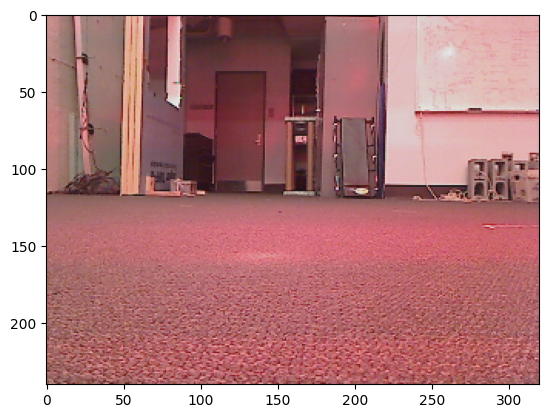

In [ ]:
plt.imshow(cam_1['cam'][..., 0])
plt.show()

Camera faces +X

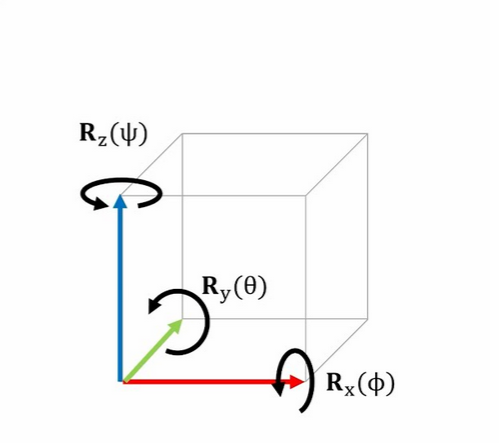

+Y goes to the left 

+X is forward

+Z is up

In [13]:
HFOV = 60 * np.pi / 180
VFOV = 45 * np.pi / 180

In [14]:
H, W, _ = cam_1['cam'][..., 0].shape

In [15]:
lat, lang = np.meshgrid(np.linspace(0, VFOV, num=H), np.linspace(0, HFOV, num=W), indexing="ij")
depth = np.ones_like(lat)

lat = (lat - VFOV / 2) + np.pi/2
lang = -(lang - HFOV / 2)

In [16]:
img_coords_spherical = np.array((lat, lang, depth)).transpose(1, 2, 0)

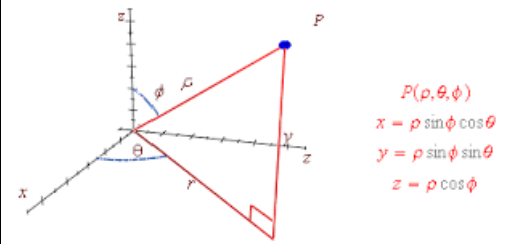

In [17]:
def sphere_to_cart(arr):
        
    # Arr[0] should be phi which is also the latitude
    # https://www.google.com/search?q=spherical+coordinates&client=firefox-b-1-d&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjmjtfPv4T9AhWzAjQIHfQTC-MQ_AUoAXoECAEQAw&biw=766&bih=738&dpr=1.25#imgrc=fQZM8dfbHm35QM
        
    y = np.sin(arr[0]) * np.sin(arr[1])
    z = np.cos(arr[0])
    x = np.sin(arr[0]) * np.cos(arr[1])
    return np.array([x, y, z])

#     y = np.sin(arr[0]) * np.cos(arr[1])
#     x = np.sin(arr[0]) * np.sin(arr[1])
#     z = np.cos(arr[0])
#     return np.array([x, y, z])

In [18]:
sphere_to_cart([0, 0, 1])

array([0., 0., 1.])

In [19]:
cartesian_coords = np.array(list(map(lambda x: sphere_to_cart(x), img_coords_spherical.reshape(-1, 3))))

In [20]:
cartesian_coords = cartesian_coords.reshape(-1, 3)

In [21]:
cartesian_coords.reshape(H, W, 3)[120][160]

array([ 0.9999973 , -0.00164137, -0.00164309])

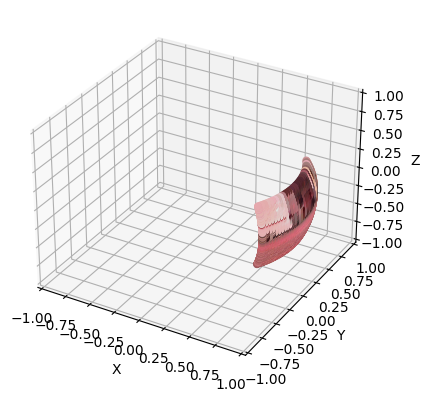

In [22]:
img = img = cam_1['cam'][..., 0]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(cartesian_coords[..., 0].flatten()[::10], cartesian_coords[..., 1].flatten()[::10], cartesian_coords[..., 2].flatten()[::10], c=img.reshape(-1, 3)[::10]/255)
# ax.view_init(elev=180, azim=180)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_zlabel("Z")
ax.set_ylabel("Y")
ax.set_xlabel("X")
plt.show()

In [23]:
# plotly_3d_point_cloud(cartesian_coords[..., 0].flatten()[::10], cartesian_coords[..., 1].flatten()[::10], cartesian_coords[..., 2].flatten()[::10], img.reshape(-1, 3)[::10])

# View All Poses

In [24]:
poses = vicon_1['rots'].transpose(2, 0, 1)
# poses = poses[::100]

/Users/jaidev/Desktop/UCSD/Sensing-and-Estimation-in-Robotics/projects/pr1/utils/pose_vis.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  self.ax = self.fig.gca(projection='3d')


initialize camera pose visualizer


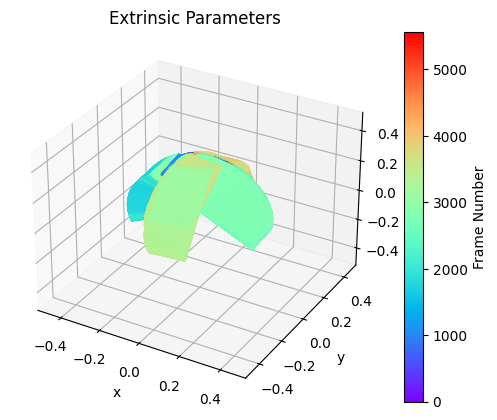

In [25]:
visualizer = CameraPoseVisualizer([-0.5, 0.5], [-0.5, 0.5], [-0.5, 0.5])
for i, pose in enumerate(poses):
    
    data_pose = np.eye(4)
    data_pose[:3, :3] = pose
    
    visualizer.extrinsic2pyramid(data_pose, plt.cm.rainbow(i / len(poses)), 0.3)
visualizer.colorbar(len(poses))
visualizer.show()

initialize camera pose visualizer


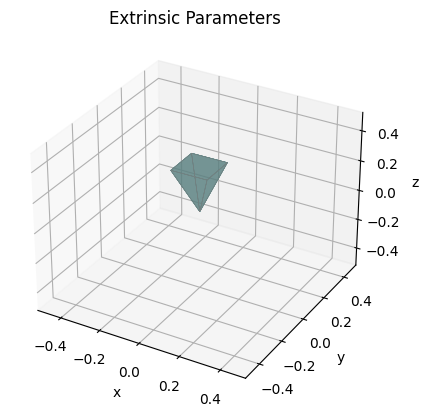

In [26]:
visualizer = CameraPoseVisualizer([-0.5, 0.5], [-0.5, 0.5], [-0.5, 0.5])
data_pose = np.eye(4)
data_pose[:3, :3] = poses[0]    
visualizer.extrinsic2pyramid(data_pose, [0.5, 0.5, 0.5], 0.3)

data_pose = np.eye(4)
data_pose[:3, :3] = poses[20]    
visualizer.extrinsic2pyramid(data_pose, [0, 0.5, 0.5], 0.3)

# visualizer.colorbar(len(poses))
visualizer.show()

# Helpers

In [27]:
def disp_img(img):
    plt.imshow(img)
    plt.title(f"{step}")
    plt.show()

# Make the final PCD

In [28]:
vicon_ts = vicon_1['ts'][0]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:05<00:00, 29.04it/s]


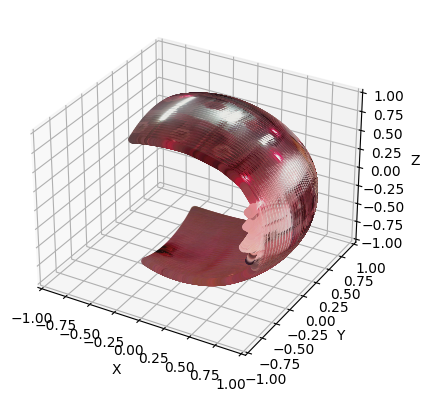

(12979200, 3) (12979200, 3)


In [29]:
pcd_all = None
img_all = None

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# steps = [50 * i for i in range(22)]
steps = range(0, num_steps, 10)
# steps = [i for i in range(0, 100, 10)]
# steps = [0]

for step in tqdm(steps):        
    
    img = cam_1['cam'][..., step]
    ts = cam_1['ts'][..., step]    
    
    time_diff = np.abs(vicon_ts - ts)
    idx = np.argsort(time_diff)[0]
    R = vicon_1['rots'][..., idx]
                    
    rotated_cartesian = (R @ cartesian_coords.T).T # Rotate the points in cartesian coords to the world frame
        
#     lang = np.arctan(rotated_cartesian[..., 1]/rotated_cartesian[..., 0]) # Convert back to spherical (longitude)
#     lat = np.arccos(rotated_cartesian[..., 2]) # Convert back to spherical (lattitude)
    
#     x = np.sin(lat) * np.cos(lang)
#     y = np.sin(lat) * np.sin(lang)
#     z = np.cos(lat)
    
#     pcd = np.array((x, y, z)).T
    pcd = rotated_cartesian
    img = img.reshape(-1, 3)
    
    if pcd_all is not None:
        pcd_all = np.concatenate([pcd, pcd_all], axis=0)
    else:
        pcd_all = pcd
    
    if img_all is not None:
        img_all = np.concatenate([img, img_all], axis=0)
    else:
        img_all = img
        
#     ax.scatter(pcd[..., 0].flatten()[::10], pcd[..., 1].flatten()[::10], pcd[..., 2].flatten()[::10], c=img[::10]/255)
        
ax.scatter(pcd_all[..., 0].flatten()[::10], pcd_all[..., 1].flatten()[::10], pcd_all[..., 2].flatten()[::10], c=img_all[::10]/255)
        
# ax.view_init(elev=180, azim=0) # For Spherical
# ax.view_init(elev=90, azim=0) # For Cylinder
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_zlabel("Z")
ax.set_ylabel("Y")
ax.set_xlabel("X")
plt.show()
        
#     if step > 3:
#         break
        
print(pcd_all.shape, img_all.shape)
# plotly_3d_point_cloud(pcd_all[..., 0].flatten()[::50], pcd_all[..., 1].flatten()[::50], pcd_all[..., 2].flatten()[::50], img_all[::50])

# Convert Sphere to Cylinder

In [30]:
lang = np.arctan2(pcd_all[..., 1], pcd_all[..., 0])
lat = np.arccos(pcd_all[..., 2]) - np.pi/2

In [31]:
min(lat), max(lat)

(-1.570513173231573, 1.5701614410061646)

In [32]:
min(lang), max(lang)

(-3.14159162619408, 3.1415826279541332)

# Unroll Cylinder to Image

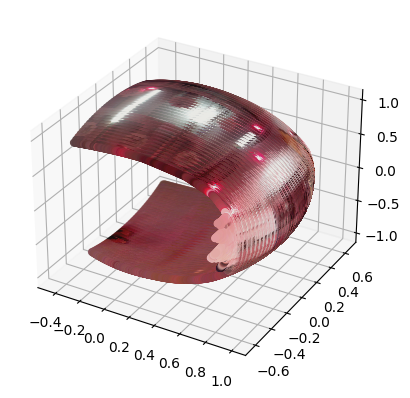

In [33]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pcd_all[..., 0].flatten()[::10], pcd_all[..., 1].flatten()[::10], pcd_all[..., 2].flatten()[::10], c=img_all[::10]/255)
plt.show()

In [34]:
H_NEW = 240 * 4 # pi
W_NEW = 320 * 5 # 2*pi
image = np.zeros((H_NEW+1, W_NEW+1, 3), dtype=np.float64)

In [35]:
j_s = pcd_all[..., 1], pcd_all[..., 0] # Longitude
j_s = np.arctan2(*j_s) / (2*np.pi) * W_NEW + W_NEW/2
j_s = W_NEW - np.uint16(np.round(j_s))

i_s = pcd_all[..., 2]
i_s = np.arccos(i_s) / np.pi * H_NEW
i_s = np.uint16(np.round(i_s))

In [36]:
image[i_s, j_s] = img_all / 255

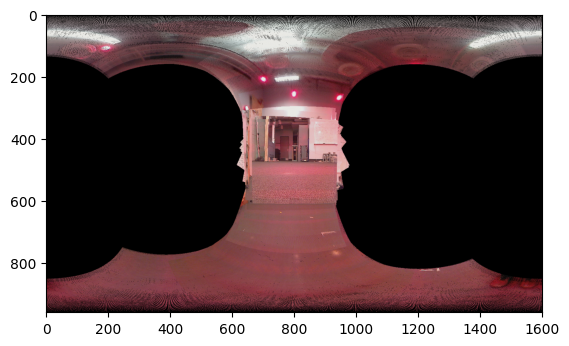

In [37]:
plt.imshow(image)
plt.show()